<a href="https://colab.research.google.com/github/andreaPorrazzo/Porrazzo-Analysis-of-climate-change-and-its-potential-impacts/blob/main/Porrazzo_Analysis_of_climate_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Global Data Overview:

Findings from the global overview recap:
shape: 28 columns, 13512 rows

* all columns are of type "object"

* the missing values are denoted by NaN

* the rows marked as 'Text' in the columns 'SCALE' and 'Decimals' are almost completely composed of NaN values

* the columns represent key values are country, years, the series code and series name

* the column 'Series name' contains the country-specific features required for the analysis



#Define the project goals:
The data series available can be summarized into the following country-specific parameter/feature categories:

* various emissions of greenhouse gases

* population-specific parameters
* country economic indicators
* land-related parameters
* climate data


Initial goal of the machine learning project: Analyze the relationships among these variable categories and evaluate the contribution of factors like country economy, energy use, land use, etc. on greenhouse gas emissions, precipitations, etc.

#Data cleaning:

* Removing rows marked as "Text" in the "SCALE" and "Decimals" columns

* Removing the unnecessary columns "Country name", "Series code", "SCALE", "Decimals"

* Transform the ".." strings and empty cells (" ") into NaN values for easier recognission as missing values

* Tranform all data columns into a numerical data type

* Rename the features in column "Series name"

#Data frame transformation:

* Remove the remaining missing values in an optimal way

* Filtering the years by missing values

* Filtering the countries by missing values

* Checking the columns for missing values

#Export of the cleaned data frame to a file

#Feature engineering: 

The available columns reveal that the features representing CO2 emissions and energy use have three different reference values:

    

*   per capita: co2_per_cap and en_per_cap
*    per unit of GDP: co2_per_gdp and en_per_gdp
*   total values: co2_ttl

#Remove the remaining missing values in an optimal way

*  Filtering the years by missing values
*  Checking the columns for missing values

#Clustering Analysis
* K-Means algorithm 
* DBSCAN clustering algorithm

#1. Notebook Setup
Import all needed libraries:

In [220]:
#!pip install --upgrade xlrd

In [221]:
#!pip install --upgrade openpyxl

In [222]:
#!pip install --upgrade pandas

In [223]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv


The complete Climate Change Dataset is imported into a pandas DataFrame form the downloaded file "climate-change-excel.xls"

In [224]:
 #read the data from the excel file to a pandas DataFrame
data=pd.read_excel('/content/drive/MyDrive/Dataset/climate-change-excel.xls') 
df = pd.DataFrame(data)

#2. Global data overview
A global overview of the imported data yields the following insights:

In [225]:
print("Shape of the original dataset:")
df.shape

Shape of the original dataset:


(13512, 28)

In [226]:
print ("Available columns:")
df.columns

Available columns:


Index(['Country code', 'Country name',  'Series code',  'Series name',
              'SCALE',     'Decimals',           1990,           1991,
                 1992,           1993,           1994,           1995,
                 1996,           1997,           1998,           1999,
                 2000,           2001,           2002,           2003,
                 2004,           2005,           2006,           2007,
                 2008,           2009,           2010,           2011],
      dtype='object')

In [227]:
print("Overiew of the first 5 rows:")
df.head()

Overiew of the first 5 rows:


,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.57481,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.208235,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.967875,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [228]:
print("Descriptive statistics of the columns:")
df.describe()

Descriptive statistics of the columns:


,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,13512,13512,13512,13512,13512,13512,10017,10017,10017,10017,...,10017,10017,10017,10017,10017,10017,10017,10017,10017,12382
unique,233,233,58,58,2,3,4355,3398,3523,3583,...,3877,3869,4007,4484,4008,4047,4080,3506,2164,1434
top,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,58,58,233,233,10017,5823,5163,6520,6364,6300,...,5960,5974,5792,4933,5781,5769,5414,6256,7685,10244


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13512 entries, 0 to 13511
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country code  13512 non-null  object
 1   Country name  13512 non-null  object
 2   Series code   13512 non-null  object
 3   Series name   13512 non-null  object
 4   SCALE         13512 non-null  object
 5   Decimals      13512 non-null  object
 6   1990          10017 non-null  object
 7   1991          10017 non-null  object
 8   1992          10017 non-null  object
 9   1993          10017 non-null  object
 10  1994          10017 non-null  object
 11  1995          10017 non-null  object
 12  1996          10017 non-null  object
 13  1997          10017 non-null  object
 14  1998          10017 non-null  object
 15  1999          10017 non-null  object
 16  2000          10017 non-null  object
 17  2001          10017 non-null  object
 18  2002          10017 non-null  object
 19  2003

To better understand the nature of the "Serial Code", "Serial Name", "SCALE" and "Decimal" columns, it is necessary to examine their values.

The next fragment prints the contents of the 'Series Name' column:

In [230]:
df['Series name'].unique()

array(['Land area below 5m (% of land area)',
       'Agricultural land under irrigation (% of total ag. land)',
       'Cereal yield (kg per hectare)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Access to electricity (% of total population)',
       'Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)',
       'Energy use per capita (kilograms of oil equivalent)',
       'CO2 emissions, total (KtCO2)',
       'CO2 emissions per capita (metric tons)',
       'CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)',
       'Other GHG emissions, total (KtCO2e)',
       'Methane (CH4) emissions, total (KtCO2e)',
       'Nitrous oxide (N2O) emissions, total (KtCO2e)',
       'Annex-I emissions reduction target',
       'Disaster risk reduction progress score (1-5 scale; 5=best)',
       'GHG net emissions/removals by LUCF (MtCO2e)',
       'Hosted Clean Development Mechanism (CDM) projects',
       'Hosted Joint Implementation (JI) projects',
       'Av

Contents of the column 'Series code'

In [231]:
df['Series code'].unique()

array(['AG.LND.EL5M.ZS', 'AG.LND.IRIG.AG.ZS', 'AG.YLD.CREL.KG',
       'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.ACCS.ZS', 'EG.USE.COMM.GD.PP.KD',
       'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC',
       'EN.ATM.CO2E.PP.GD.KD', 'EN.ATM.GHGO.KT.CE', 'EN.ATM.METH.KT.CE',
       'EN.ATM.NOXE.KT.CE', 'EN.CLC.AERT', 'EN.CLC.DRSK.XQ',
       'EN.CLC.GHGR.MT.CE', 'EN.CLC.HCDM', 'EN.CLC.HJIP',
       'EN.CLC.HPPT.MM', 'EN.CLC.ICER', 'EN.CLC.IERU', 'EN.CLC.MDAT.ZS',
       'EN.CLC.MMDT.C', 'EN.CLC.NAMA', 'EN.CLC.NAPA', 'EN.CLC.NCOM',
       'EN.CLC.PCAT.C', 'EN.CLC.PCCC', 'EN.CLC.PCHW', 'EN.CLC.PCPT.MM',
       'EN.CLC.RNET', 'EN.POP.EL5M.ZS', 'EN.URB.MCTY.TL.ZS',
       'ER.H2O.FWTL.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ',
       'IE.PPI.ENGY.CD', 'IE.PPI.TELE.CD', 'IE.PPI.TRAN.CD',
       'IE.PPI.WATR.CD', 'IQ.CPA.PUBS.XQ', 'IS.ROD.PAVE.ZS',
       'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS',
       'SE.PRM.CMPT.ZS', 'SH.DYN.MORT', 'SH.H2O.SAFE.ZS',
       'SH.MED.NUMW.P3', 'S

In [232]:
df['Country name'].unique()

array(['Aruba', 'Andorra', 'Afghanistan', 'Angola', 'Albania',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Rep.', 'Cook Islands', 'Colombia', 'Comoros', 'Cape Verde',
       'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria', 'East Asia & Pacific',
       'Europe & Central Asia', 'Ecuador', 'Egypt, Arab Rep.',
       'Euro area', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia'

Contents of the column 'SCALE':

In [233]:
df['SCALE'].unique()

array([0, 'Text'], dtype=object)

Contents of the column 'Decimals':

In [234]:
df['Decimals'].unique()

array([1, 0, 'Text'], dtype=object)

At this time it is not clear which values are marked with the 'Text' label in the 'SCALE' and 'Decimals' columns. These are shown in the following tow outputs:

In [235]:
df[df['SCALE']=='Text']

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
3029,ABW,Aruba,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3030,ADO,Andorra,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3031,AFG,Afghanistan,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3032,AGO,Angola,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3033,ALB,Albania,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7218,YEM,"Yemen, Rep.",EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..
7219,ZAF,South Africa,EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
7220,ZAR,"Congo, Dem. Rep.",EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..
7221,ZMB,Zambia,EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..


Findings from the global overview recap:


*   shape: 28 columns, 13512 rows
*   all columns are of type "object"
*   the missing values are denoted by NaN 
*  the rows marked as 'Text' in the columns 'SCALE' and 'Decimals' are almost completely composed of NaN values
*  the columns represent key values are country, years, the series code and series name
*  the column 'Series name' contains the country-specific features required for the analysis




In [236]:
d1_df = df.drop([ 'Series code', 'SCALE','Decimals',2008], axis=1)


In [237]:
d1_df


,Country code,Country name,Series name,1990,1991,1992,1993,1994,1995,1996,...,2001,2002,2003,2004,2005,2006,2007,2009,2010,2011
0,ABW,Aruba,Land area below 5m (% of land area),29.57481,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,ADO,Andorra,Land area below 5m (% of land area),0,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,AFG,Afghanistan,Land area below 5m (% of land area),0,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,AGO,Angola,Land area below 5m (% of land area),0.208235,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,ALB,Albania,Land area below 5m (% of land area),4.967875,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13507,YEM,"Yemen, Rep.",Urban population,2497175.681,2693642.2632,2909756.3552,3139637.3184,3373929.855,3605264.936,3817581.273,...,4898943.3456,5148619.3146,5410331.206,5683412.0046,5967457.827,6275723.036,6597265.194,7283068.4108,7648699.452,..
13508,ZAF,South Africa,Urban population,18304000,18864881.576074,19446091.545173,20048481.072485,20672940.243054,21320400,21992135.775175,...,25769207.6644,26345562.7512,26904362.5996,27448218.3022,27988692.117,28533559.5188,29079838.1332,30193795.83,30844632.1,..
13509,ZAR,"Congo, Dem. Rep.",Urban population,10120930.828,10569454.3904,11060046.8476,11568627.5584,12061489.8516,12515132.796,12990617.1852,...,15429399.7024,16125336.2688,16867832.791,17640845.614,18431987.562,19333729.388,20261443.145,22201848.3232,23219959.84,..
13510,ZMB,Zambia,Urban population,3096860.882,3141668.2968,3183257.2304,3223514.6742,3264940.1844,3309118.176,3356931.5184,...,3640719.03,3729882.6848,3819640.7412,3912870.7312,4011827.75,4128986.897,4253139.4752,4524564.0776,4614728.013,..


In [238]:
select_country = df.loc[df['Country code'] == 'ITA']
select_country

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
99,ITA,Italy,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,5.188644,..,..,..,...,..,..,..,..,..,..,..,..,..,..
332,ITA,Italy,AG.LND.IRIG.AG.ZS,Agricultural land under irrigation (% of total...,0,1,..,..,..,..,...,..,18.333669,..,17.732085,..,18.825025,..,..,..,..
565,ITA,Italy,AG.YLD.CREL.KG,Cereal yield (kg per hectare),0,0,3944.9,4366.2,4707.4,4851.3,...,4959.1,4307.1,5444.4,5361.3,5316,5173.9,5353,5035.4,..,..
798,ITA,Italy,BX.KLT.DINV.WD.GD.ZS,"Foreign direct investment, net inflows (% of GDP)",0,1,0.565612,0.20085,0.245262,0.367171,...,1.205916,1.097274,0.971807,1.104623,2.093346,1.892206,-0.413175,0.785288,0.467944,..
1031,ITA,Italy,EG.ELC.ACCS.ZS,Access to electricity (% of total population),0,1,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1264,ITA,Italy,EG.USE.COMM.GD.PP.KD,"Energy use per units of GDP (kg oil eq./$1,000...",0,1,108.681641,109.675343,108.153308,108.551452,...,106.797138,111.168792,111.058417,111.476098,108.198385,104.858412,104.465985,103.059051,105.165091,..
1497,ITA,Italy,EG.USE.PCAP.KG.OE,Energy use per capita (kilograms of oil equiva...,0,0,2583.899011,2645.667224,2627.312063,2611.947741,...,3016.166183,3114.726763,3128.308921,3137.384854,3089.506071,3016.317108,2942.621896,2735.049358,2813.51418,..
1730,ITA,Italy,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,424183.892,433974.782,432959.023,422680.422,...,449284.507,468349.24,470490.768,471400.184,468268.566,459376.091,445118.795,..,..,..
1963,ITA,Italy,EN.ATM.CO2E.PC,CO2 emissions per capita (metric tons),0,1,7.478691,7.645967,7.622833,7.437269,...,7.860478,8.130407,8.087466,8.043404,7.944633,7.736823,7.439455,..,..,..
2196,ITA,Italy,EN.ATM.CO2E.PP.GD.KD,"CO2 emissions per units of GDP (kg/$1,000 of 2...",0,1,314.562,316.961285,313.793955,309.08976,...,278.325711,290.185166,287.113967,285.794489,278.231024,268.960764,264.108,..,..,..


In [239]:
df['Series name'].value_counts()


Land area below 5m (% of land area)                                 233
Projected change in annual hot days/warm nights                     233
Renewable energy target                                             233
Population below 5m (% of total)                                    233
Population in urban agglomerations >1million (%)                    233
Annual freshwater withdrawals (% of internal resources)             233
Nationally terrestrial protected areas (% of total land area)       233
Ease of doing business (ranking 1-183; 1=best)                      233
Invest. in energy w/ private participation ($)                      233
Invest. in telecoms w/ private participation ($)                    233
Invest. in transport w/ private participation ($)                   233
Invest. in water/sanit. w/ private participation ($)                233
Public sector mgmt & institutions avg. (1-6 scale; 6=best)          233
Paved roads (% of total roads)                                  

In [240]:
df.describe(include = 'all')



,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,13512,13512,13512,13512,13512,13512,10017,10017,10017,10017,...,10017,10017,10017,10017,10017,10017,10017,10017,10017,12382
unique,233,233,58,58,2,3,4355,3398,3523,3583,...,3877,3869,4007,4484,4008,4047,4080,3506,2164,1434
top,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,58,58,233,233,10017,5823,5163,6520,6364,6300,...,5960,5974,5792,4933,5781,5769,5414,6256,7685,10244


#3. Define the inital project goals


The first overview of the raw data makes it possible to define the initial aims and objectives of the machine learning project. These will be refined going forward as additional information is derived from the data. However, this initial goal definition will help develop a strategy and organize the data cleaning, transformation and visualization.

The data series available can be summarized into the following country-specific parameter/feature categories:


*   various emissions of greenhouse gases 
*   population-specific parameters
*   country economic indicators
*   land-related parameters
*   climate data
*   etc

Initial goal of the machine learning project: Analyze the relationships among these variable categories and evaluate the contribution of factors like country economy, energy use, land use, etc. on greenhouse gas emissions, precipitations, etc.





#4. Data cleaning


Organization of the data cleaning and transformation

The main purpose of data cleaning and transformation is to represent the characteristics (the country parameters contained in the column 'Series name') in separate columns and make each row identifiable by country and year. At the same time, it would make sense to transform the years into a single column.

Additionally, it is necessary to get rid of empty rows or columns and deal with the remaining cells with missing values.

#4.1 Removing rows marked as "Text" in the "SCALE" and "Decimals" columns

In [241]:
# create new DataFrame in which the data will be modified
data_clean=df

print("Original number of rows:")
print(data_clean.shape[0])

# remove rows characterized as "Text" in the SCALE column, re valutetions ##
data_clean = data_clean[data_clean['SCALE']!= 'Text']

print("Current number of rows:")
print(data_clean.shape[0])


Original number of rows:
13512
Current number of rows:
10017


#4.2 Removing the unnecessary columns "Country name", "Series code", "SCALE", "Decimals"

In [242]:
print("Original number of columns:")
print(data_clean.shape[1])

data_clean = data_clean.drop(['Country name', 'Series code', 'SCALE', 'Decimals'], axis='columns')

print("Current number of columns:")
print(data_clean.shape[1])

Original number of columns:
28
Current number of columns:
24


#4.3 Transform the ".." strings and empty cells (" ") into NaN values for easier recognission as missing values

In [243]:
data_clean.iloc[:,2:]= data_clean.iloc[:,2:].replace({'':np.nan, '..':np.nan})

#4.4 Tranform all data columns into a numerical data type

In [244]:
data_clean2 = data_clean.applymap(lambda x: pd.to_numeric(x,errors='ignore'))

print("Print the column data types after transformation:")
data_clean2.dtypes

Print the column data types after transformation:


Country code     object
Series name      object
1990            float64
1991            float64
1992            float64
1993            float64
1994            float64
1995            float64
1996            float64
1997            float64
1998            float64
1999            float64
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
dtype: object

#4.5 Rename the features in column "Series name"

The variable names in the column "Series name" are to long and not pratical to use in the code. So, I renamed with a shorter names.

In [245]:
# define shorter names corresponding to most relevant variables in a dictionary
chosen_vars = {'Cereal yield (kg per hectare)': 'cereal_yield',
               'Foreign direct investment, net inflows (% of GDP)': 'fdi_perc_gdp',
               'Access to electricity (% of total population)': 'elec_access_perc',
               'Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)': 'en_per_gdp',
               'Energy use per capita (kilograms of oil equivalent)': 'en_per_cap',
               'CO2 emissions, total (KtCO2)': 'co2_ttl',
               'CO2 emissions per capita (metric tons)': 'co2_per_cap',
               'CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)': 'co2_per_gdp',
               'Other GHG emissions, total (KtCO2e)': 'other_ghg_ttl',
               'Methane (CH4) emissions, total (KtCO2e)': 'ch4_ttl',
               'Nitrous oxide (N2O) emissions, total (KtCO2e)': 'n2o_ttl',
               'Droughts, floods, extreme temps (% pop. avg. 1990-2009)': 'nat_emerg',
               'Population in urban agglomerations >1million (%)': 'pop_urb_aggl_perc',
               'Nationally terrestrial protected areas (% of total land area)': 'prot_area_perc',
               'GDP ($)': 'gdp',
               'GNI per capita (Atlas $)': 'gni_per_cap',
               'Under-five mortality rate (per 1,000)': 'under_5_mort_rate',
               'Population growth (annual %)': 'pop_growth_perc',
               'Population': 'pop',
               'Urban population growth (annual %)': 'urb_pop_growth_perc',
               'Urban population': 'urb_pop'
                }

      

In [246]:
# define shorter names corresponding to most relevant variables in a dictionary
chosen_vars2 = {
    'Aruba':  'Aruba', 'Andorra': 'Andorra', 'Afghanistan':'Afghanistan', 'Angola':'Angola', 'Albania':'Albania',
       'United Arab Emirates':  'United Arab Emirates', 'Argentina': 'Argentina', 'Armenia':'Armenia', 'American Samoa':'American Samoa',
       
       
    
      }

In [247]:
#rename all variables in the column "Series name" with comprenhensible  shortest  version
data_clean2['Series name'] = data_clean2['Series name'].replace(to_replace= chosen_vars)

#5. Data frame transformation

In [248]:
data_clean2.head()

,Country code,Series name,1990,1991,1992,1993,1994,1995,1996,1997,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Land area below 5m (% of land area),29.574810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADO,Land area below 5m (% of land area),0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Land area below 5m (% of land area),0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGO,Land area below 5m (% of land area),0.208235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALB,Land area below 5m (% of land area),4.967875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It is necessary to transform the data frame into a suitable format- the feature from the 'Series name' column into separate columns and the years into a single column. This is done by picking the corresponding values of each feature together with their countries and years, melting these into a single column and then combine them into a new data frame with all features (based on the same countries and years):

In [249]:
data_clean2.columns

Index(['Country code',  'Series name',           1990,           1991,
                 1992,           1993,           1994,           1995,
                 1996,           1997,           1998,           1999,
                 2000,           2001,           2002,           2003,
                 2004,           2005,           2006,           2007,
                 2008,           2009,           2010,           2011],
      dtype='object')

In [250]:
#id_cols = ['Country code', 'Series name']

In [251]:
#year_cols = ['1990', '1991', '1992', '1993', '1994', '1995', '1996',
 #      '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
 #      '2006', '2007', '2008', '2009', '2010', '2011']

In [252]:
#melted = pd.melt(data_clean2, id_vars=id_cols, value_vars=year_cols, var_name='year')

In [253]:
#!pip install --upgrade utils

In [254]:
#!pip install --upgrade functools32

In [255]:
def reduce(func, seq):
    if len(seq) == 1:
        return seq[0]
    return func(seq[0], reduce(func, seq[1:]))

In [256]:
# save the short feature names into a list of strings
chosen_cols = list(chosen_vars.values())

# define an emply list, where sub-dataframes for each feature will be saved
frame_list = []

# iterate over all chosen features
for feature in chosen_cols:

  frame = data_clean2[data_clean2['Series name'] == feature]

 
  frame = frame.melt(id_vars=['Country code', 'Series name']).rename(columns={'Country code': 'country', 'variable': 'year', 'value': feature}).drop(['Series name'], axis='columns')

  frame_list.append(frame)

#from functools import reduce
  #all_vars = reduce (lambda left, right: pd.merge(left, right, on=['country', 'year'], how='outer'), frame_list)
  all_vars = reduce(lambda left, right: pd.merge(left, right, on = ['country', 'year'], how = 'outer'), frame_list)

The new data frame after transformation

In [257]:
all_vars.head()

,country,year,cereal_yield,fdi_perc_gdp,elec_access_perc,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,...,nat_emerg,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,ABW,1990,NaN,NaN,NaN,NaN,NaN,1840.834,29.620641,NaN,...,NaN,NaN,0.105547,NaN,NaN,NaN,1.820254,62147.0,1.780501,31259.941
1,ADO,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.559145,1.028989e+09,17440.0,8.8,2.945970,52773.0,2.840429,49976.031
2,AFG,1990,1200.6,NaN,NaN,NaN,NaN,2676.910,0.140715,NaN,...,NaN,6.739396,0.432993,NaN,NaN,208.7,2.082624,19023678.0,3.492189,3481333.074
3,AGO,1990,320.9,-3.263096,NaN,172.978279,569.242999,4429.736,0.428613,130.244398,...,NaN,15.171061,12.399821,1.026019e+10,740.0,243.0,2.771320,10335052.0,6.505966,3834304.292
4,ALB,1990,2794.3,NaN,NaN,206.751128,809.215612,7488.014,2.276350,581.597641,...,NaN,NaN,4.336615,2.101625e+09,680.0,41.1,1.027427,3289483.0,1.744276,1197371.812


In [258]:
# export the clean dataframe to a csv file
#all_vars.to_csv('/content/drive/MyDrive/Dataset/data_visualization.csv', index='year')

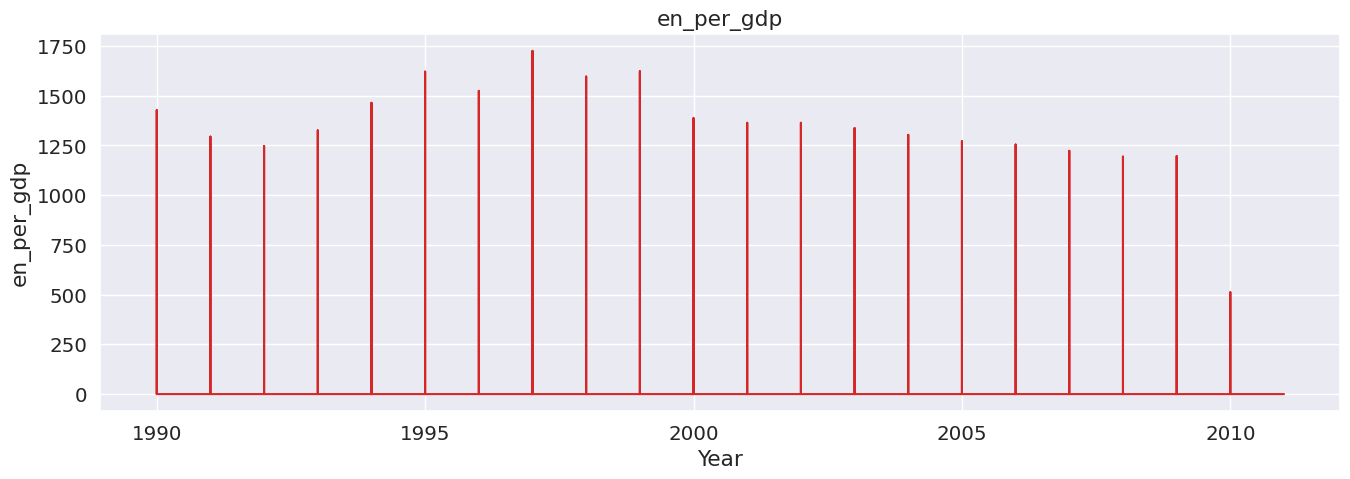

In [259]:
df_visualization = pd.read_csv('/content/drive/MyDrive/Dataset/data_visualization.csv', index_col='year')

# Draw Plot
def plot_df(df_visualization, x, y, title="", xlabel='Year', ylabel='en_per_gdp', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df_visualization, x=df_visualization.index, y=df_visualization['en_per_gdp'], title='en_per_gdp') 


Text(0, 0.5, 'Pop')

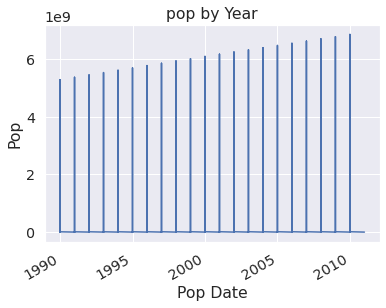

In [260]:
# Draw Plot


pop_date = df_visualization.index
 
# Y axis is pop 
pop = df_visualization['pop']
 
# Plotting the timeseries graph of given dataset
plt.plot(pop_date, pop)
 
# Giving title to the graph
plt.title('pop by Year')
 
# rotating the x-axis tick labels at 30degree
# towards right
plt.xticks(rotation=30, ha='right')
 
# Giving x and y label to the graph
plt.xlabel('Pop Date')
plt.ylabel('Pop')

  #plot_df(df_visualization, x=df_visualization.index, y=df_visualization['pop'], title='carbon footprint.') 


Text(0, 0.5, 'co2_ttl')

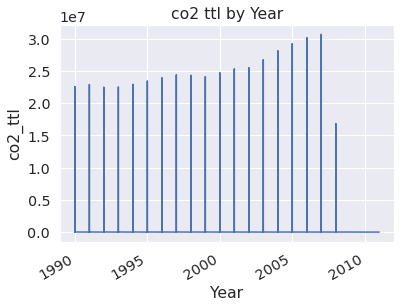

In [261]:
# Draw Plot
#def plot_df(df_visualization, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):

co2_ttl_date = df_visualization.index
 
# Y axis is price closing
co2_ttl = df_visualization['co2_ttl']
 
# Plotting the timeseries graph of given dataset
plt.plot(co2_ttl_date, co2_ttl)
 
# Giving title to the graph
plt.title('co2 ttl by Year')
 
# rotating the x-axis tick labels at 30degree
# towards right
plt.xticks(rotation=30, ha='right')
 
# Giving x and y label to the graph
plt.xlabel(' Year ')
plt.ylabel('co2_ttl')

  #plot_df(df_visualization, x=df_visualization.index, y=df_visualization['pop'], title='carbon footprint.') 

#6.  Remove the remaining missing values in an optimal way

Although some columns and rows with empty cells have already been deleted, there are still remaining missing values:

In [262]:
print("check the amount of missing values in each column")
all_vars.isnull().sum()

check the amount of missing values in each column


country                   0
year                      0
cereal_yield           1377
fdi_perc_gdp           1111
elec_access_perc       5027
en_per_gdp             2082
en_per_cap             1956
co2_ttl                1143
co2_per_cap            1146
co2_per_gdp            1557
other_ghg_ttl          4542
ch4_ttl                4526
n2o_ttl                4526
nat_emerg              4958
pop_urb_aggl_perc      2582
prot_area_perc          726
gdp                     779
gni_per_cap            1013
under_5_mort_rate       716
pop_growth_perc         278
pop                     252
urb_pop_growth_perc     490
urb_pop                 467
dtype: int64

In [263]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [264]:
missing_values_table(all_vars)

Your selected dataframe has 23 columns.
There are 21 columns that have missing values.


,Missing Values,% of Total Values
elec_access_perc,5027,98.1
nat_emerg,4958,96.7
other_ghg_ttl,4542,88.6
n2o_ttl,4526,88.3
ch4_ttl,4526,88.3
pop_urb_aggl_perc,2582,50.4
en_per_gdp,2082,40.6
en_per_cap,1956,38.2
co2_per_gdp,1557,30.4
cereal_yield,1377,26.9


#6.1 Filtering the years by missing values

Checking the amount of missing values for each year:

In [265]:
all_vars_clean = all_vars

#define an array with the unique year values

years_count_missing = dict.fromkeys(all_vars_clean['year'].unique(),0)

for ind, row in all_vars_clean.iterrows():
  years_count_missing[row['year']] += row.isnull().sum()

#sort the years by missing values

years_missing_sorted = dict(sorted(years_count_missing.items(), key=lambda item: item[1]))

#print the missing values for each year

print("missing values by year:")

for key, val in years_missing_sorted.items():
  print(key, ":", val)

missing values by year:
2005 : 1189
2000 : 1273
1995 : 1317
1990 : 1427
2007 : 1631
2006 : 1633
2004 : 1646
2008 : 1708
2003 : 1714
2002 : 1715
2001 : 1718
1999 : 1729
1998 : 1739
1997 : 1746
1996 : 1756
1994 : 1781
1993 : 1792
1992 : 1810
1991 : 1921
2009 : 2078
2010 : 3038
2011 : 4893


In [266]:
missing_values_table(all_vars_clean)

Your selected dataframe has 23 columns.
There are 21 columns that have missing values.


,Missing Values,% of Total Values
elec_access_perc,5027,98.1
nat_emerg,4958,96.7
other_ghg_ttl,4542,88.6
n2o_ttl,4526,88.3
ch4_ttl,4526,88.3
pop_urb_aggl_perc,2582,50.4
en_per_gdp,2082,40.6
en_per_cap,1956,38.2
co2_per_gdp,1557,30.4
cereal_yield,1377,26.9


The goal of filtering is to delete rows with a significant number of missing values for certain countries without deleting too many years. It is therefore important to select the correct limit for the permitted NaN values per year. The previous production suggests selecting the years between 1991 and 2008 for the rest of the analysis.

In [267]:
print("number of missing values in whole dataset before filtering the years:")
print(all_vars_clean.isnull().sum().sum())
print("number of rows before filtering the years:")
print(all_vars_clean.shape[0])

# filter only rows for years between 1991 and 2008, with less missing values
#add treshold for years
starting_year= 1991
ending_year=2008
all_vars_clean = all_vars_clean[(all_vars_clean['year'] >= starting_year) & (all_vars_clean['year']< ending_year)]

print("number of missing values in the whole dataset after filtering the years:")
all_vars_clean.isnull().sum().sum()
print("number of rows after filtering the years:")
print(all_vars_clean.shape[0])


number of missing values in whole dataset before filtering the years:
41254
number of rows before filtering the years:
5126
number of missing values in the whole dataset after filtering the years:
number of rows after filtering the years:
3961


In [268]:
missing_values_table(all_vars_clean)

Your selected dataframe has 23 columns.
There are 21 columns that have missing values.


,Missing Values,% of Total Values
elec_access_perc,3961,100.0
nat_emerg,3961,100.0
other_ghg_ttl,3523,88.9
n2o_ttl,3511,88.6
ch4_ttl,3511,88.6
pop_urb_aggl_perc,1903,48.0
en_per_gdp,1401,35.4
en_per_cap,1301,32.8
cereal_yield,762,19.2
co2_per_gdp,745,18.8


# *6.3 Checking the columns for missing values*

In [269]:
all_vars_clean.isnull().sum()

country                   0
year                      0
cereal_yield            762
fdi_perc_gdp            696
elec_access_perc       3961
en_per_gdp             1401
en_per_cap             1301
co2_ttl                 379
co2_per_cap             382
co2_per_gdp             745
other_ghg_ttl          3523
ch4_ttl                3511
n2o_ttl                3511
nat_emerg              3961
pop_urb_aggl_perc      1903
prot_area_perc          221
gdp                     410
gni_per_cap             600
under_5_mort_rate       391
pop_growth_perc          37
pop                      17
urb_pop_growth_perc     208
urb_pop                 190
dtype: int64

After filtered the years and the countries, I can see features with a lot of missing values, so I removed those if the missing values are more than 40.

In [270]:
missing_values_table(all_vars_clean)

Your selected dataframe has 23 columns.
There are 21 columns that have missing values.


,Missing Values,% of Total Values
elec_access_perc,3961,100.0
nat_emerg,3961,100.0
other_ghg_ttl,3523,88.9
n2o_ttl,3511,88.6
ch4_ttl,3511,88.6
pop_urb_aggl_perc,1903,48.0
en_per_gdp,1401,35.4
en_per_cap,1301,32.8
cereal_yield,762,19.2
co2_per_gdp,745,18.8


# 7. Export of the cleaned data frame to a file

In [271]:
# export the clean dataframe to a csv file
all_vars_clean.to_csv('/content/drive/MyDrive/Dataset/data_cleaned.csv', index=False)


Preparate for the visualization

# 8.Define the hypothesis to be investigated

the CO2 emissions depend on the rest of the country-specific features available in the dataset such as energy use, various population metrics, GDP, cereal yield, etc. and can be predicted from these.

In [272]:
data_cleaned= pd.read_csv('/content/drive/MyDrive/Dataset/data_cleaned.csv')

In [273]:
print("Shape of the dataset:")
data_cleaned.shape


Shape of the dataset:


(3961, 23)

In [274]:
print("available columns and their data types:")
data_cleaned.dtypes


available columns and their data types:


country                 object
year                     int64
cereal_yield           float64
fdi_perc_gdp           float64
elec_access_perc       float64
en_per_gdp             float64
en_per_cap             float64
co2_ttl                float64
co2_per_cap            float64
co2_per_gdp            float64
other_ghg_ttl          float64
ch4_ttl                float64
n2o_ttl                float64
nat_emerg              float64
pop_urb_aggl_perc      float64
prot_area_perc         float64
gdp                    float64
gni_per_cap            float64
under_5_mort_rate      float64
pop_growth_perc        float64
pop                    float64
urb_pop_growth_perc    float64
urb_pop                float64
dtype: object

In [275]:
print("Overview of the first 5 rows:")
data_cleaned.head()


Overview of the first 5 rows:


,country,year,cereal_yield,fdi_perc_gdp,elec_access_perc,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,...,nat_emerg,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,ABW,1991,NaN,21.185138,NaN,NaN,NaN,1928.842,29.838835,NaN,...,NaN,NaN,0.104930,8.720670e+08,NaN,NaN,3.936181,6.464200e+04,3.337974,3.232100e+04
1,ADO,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.558739,1.106891e+09,18820.0,8.2,4.126076,5.499600e+04,3.914659,5.197122e+04
2,AFG,1991,1160.0,NaN,NaN,NaN,NaN,2493.560,0.126777,NaN,...,NaN,7.041783,0.433001,NaN,NaN,197.6,3.391207,1.966881e+07,4.961025,3.658399e+06
3,AGO,1991,417.4,5.449515,NaN,179.271884,565.451027,4367.397,0.409949,129.971142,...,NaN,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,1.065352e+07,6.687032,4.099473e+06
4,ALB,1991,2071.8,NaN,NaN,205.474931,565.879281,3971.361,1.206479,438.081414,...,NaN,NaN,4.336453,1.139167e+09,420.0,39.8,0.067222,3.291695e+06,1.431500,1.214635e+06


In [276]:
data_cleaned.columns

Index(['country', 'year', 'cereal_yield', 'fdi_perc_gdp', 'elec_access_perc',
       'en_per_gdp', 'en_per_cap', 'co2_ttl', 'co2_per_cap', 'co2_per_gdp',
       'other_ghg_ttl', 'ch4_ttl', 'n2o_ttl', 'nat_emerg', 'pop_urb_aggl_perc',
       'prot_area_perc', 'gdp', 'gni_per_cap', 'under_5_mort_rate',
       'pop_growth_perc', 'pop', 'urb_pop_growth_perc', 'urb_pop'],
      dtype='object')

In [277]:
#data_cleaned1 = data_cleaned.drop(columns=[ 'cereal_yield', 'fdi_perc_gdp', 'elec_access_perc',
     #  'en_per_gdp', 'en_per_cap', 'co2_ttl', 'co2_per_cap',
     #  'other_ghg_ttl', 'ch4_ttl', 'n2o_ttl', 'nat_emerg', 'pop_urb_aggl_perc',
     #  'prot_area_perc', 'gdp', 'gni_per_cap', 'under_5_mort_rate',
     #  'pop_growth_perc', 'pop', 'urb_pop_growth_perc', 'urb_pop'])

In [278]:
data_cleaned1=data_cleaned

In [279]:
data_cleaned1.head()

,country,year,cereal_yield,fdi_perc_gdp,elec_access_perc,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,...,nat_emerg,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,ABW,1991,NaN,21.185138,NaN,NaN,NaN,1928.842,29.838835,NaN,...,NaN,NaN,0.104930,8.720670e+08,NaN,NaN,3.936181,6.464200e+04,3.337974,3.232100e+04
1,ADO,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.558739,1.106891e+09,18820.0,8.2,4.126076,5.499600e+04,3.914659,5.197122e+04
2,AFG,1991,1160.0,NaN,NaN,NaN,NaN,2493.560,0.126777,NaN,...,NaN,7.041783,0.433001,NaN,NaN,197.6,3.391207,1.966881e+07,4.961025,3.658399e+06
3,AGO,1991,417.4,5.449515,NaN,179.271884,565.451027,4367.397,0.409949,129.971142,...,NaN,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,1.065352e+07,6.687032,4.099473e+06
4,ALB,1991,2071.8,NaN,NaN,205.474931,565.879281,3971.361,1.206479,438.081414,...,NaN,NaN,4.336453,1.139167e+09,420.0,39.8,0.067222,3.291695e+06,1.431500,1.214635e+06


In [280]:
print("Descriptive statistics:")
data_cleaned.describe()


Descriptive statistics:


,year,cereal_yield,fdi_perc_gdp,elec_access_perc,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,other_ghg_ttl,...,nat_emerg,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
count,3961.000000,3199.000000,3265.000000,0.0,2560.000000,2660.000000,3.582000e+03,3579.000000,3216.000000,438.000000,...,0.0,2058.000000,3740.000000,3.551000e+03,3361.000000,3570.000000,3924.000000,3.944000e+03,3753.000000,3.771000e+03
mean,1999.000000,2556.067575,5.191128,NaN,252.215419,2233.289054,5.301237e+05,4.749171,454.889106,14800.491781,...,NaN,22.275077,10.817279,6.187219e+11,7841.262691,58.449825,1.492548,1.402977e+08,2.278379,6.515688e+07
std,4.899598,1646.178535,22.766598,NaN,194.858546,2614.037385,2.407273e+06,6.560255,422.092131,63393.205724,...,NaN,16.343707,10.027346,3.311947e+12,13539.288453,57.453071,1.561522,6.388069e+08,1.985212,2.863167e+08
min,1991.000000,54.200000,-82.892095,NaN,7.035833,9.021294,3.667000e+00,0.000557,2.242540,0.000000,...,NaN,3.530039,0.000000,9.365458e+06,80.000000,2.500000,-10.955149,1.598000e+03,-5.732363,4.940034e+03
25%,1995.000000,1317.400000,0.709666,NaN,135.835658,568.084580,1.125769e+03,0.620520,207.542697,0.400000,...,NaN,11.612385,3.508975,2.371799e+09,620.000000,14.000000,0.525790,6.390300e+05,0.864250,4.503424e+05
50%,1999.000000,2182.800000,2.170287,NaN,197.624918,1213.483631,9.360017e+03,2.353773,330.842351,187.650000,...,NaN,17.952560,7.990974,1.005347e+10,2130.000000,35.250000,1.457163,5.396216e+06,2.116004,2.957913e+06
75%,2003.000000,3349.400000,4.804707,NaN,296.093519,3025.665538,7.868190e+04,6.951475,560.027042,1839.975000,...,NaN,28.074882,15.114036,1.028639e+11,8120.000000,89.800000,2.404546,2.278888e+07,3.519246,1.235664e+07
max,2007.000000,9453.700000,564.916268,NaN,1725.330144,23599.084662,3.064936e+07,68.626180,4219.041512,724182.600000,...,NaN,100.000000,53.749825,5.580488e+13,160180.000000,305.900000,18.588317,6.610030e+09,19.733480,3.264974e+09


In [281]:
data_cleaned.tail()

,country,year,cereal_yield,fdi_perc_gdp,elec_access_perc,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,...,nat_emerg,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
3956,YEM,2007,1019.4,4.235665,NaN,145.202573,325.325432,21976.331,1.001337,446.926923,...,NaN,9.149756,0.520661,2.165655e+10,870.0,83.5,3.048318,21946990.0,4.996650,6.597265e+06
3957,ZAF,2007,2791.8,2.004735,NaN,306.914442,2876.946613,433358.726,8.980173,958.010371,...,NaN,32.902483,6.859550,2.861691e+11,5770.0,70.3,1.096679,48257282.0,1.896416,2.907984e+07
3958,ZAR,2007,771.5,18.121536,NaN,1223.051316,353.058814,2552.232,0.041997,145.483249,...,NaN,17.101919,9.986567,9.977079e+09,150.0,176.7,2.809715,60772175.0,4.686852,2.026144e+07
3959,ZMB,2007,1907.9,11.470850,NaN,493.133638,612.264860,1719.823,0.142660,114.902108,...,NaN,11.103952,35.983018,1.154143e+10,750.0,128.3,2.564919,12055384.0,2.962534,4.253139e+06
3960,ZWE,2007,653.0,1.372997,NaN,NaN,767.566296,9618.541,0.770640,NaN,...,NaN,12.508856,28.007713,5.018218e+09,400.0,92.0,-0.387112,12481245.0,0.923666,4.600587e+06


#9. Feature engineering

The available columns reveal that the features representing CO2 emissions and energy use have three different reference values:

    

*   per capita: co2_per_cap and en_per_cap
*    per unit of GDP: co2_per_gdp and en_per_gdp
*   total values: co2_ttl
    

Since the energy use is not available as a total value, an additional column will be derived by multiplying the value referred to a unit of GDP 'en-er_gdp' with the column 'gdp' and dividing by 1000 (The energy use per unit of GDP is defined in the dataset documentation as the energy use in kilograms of oil equivalent per $1000 of GDP ).

Create a column for the total energy use:

In [282]:
# create a column for the total energy use
data_cleaned['en_ttl'] = data_cleaned['en_per_gdp'] * data_cleaned['gdp'] /1000



choose the best unite/reference value for the CO2 emissions and the energy use

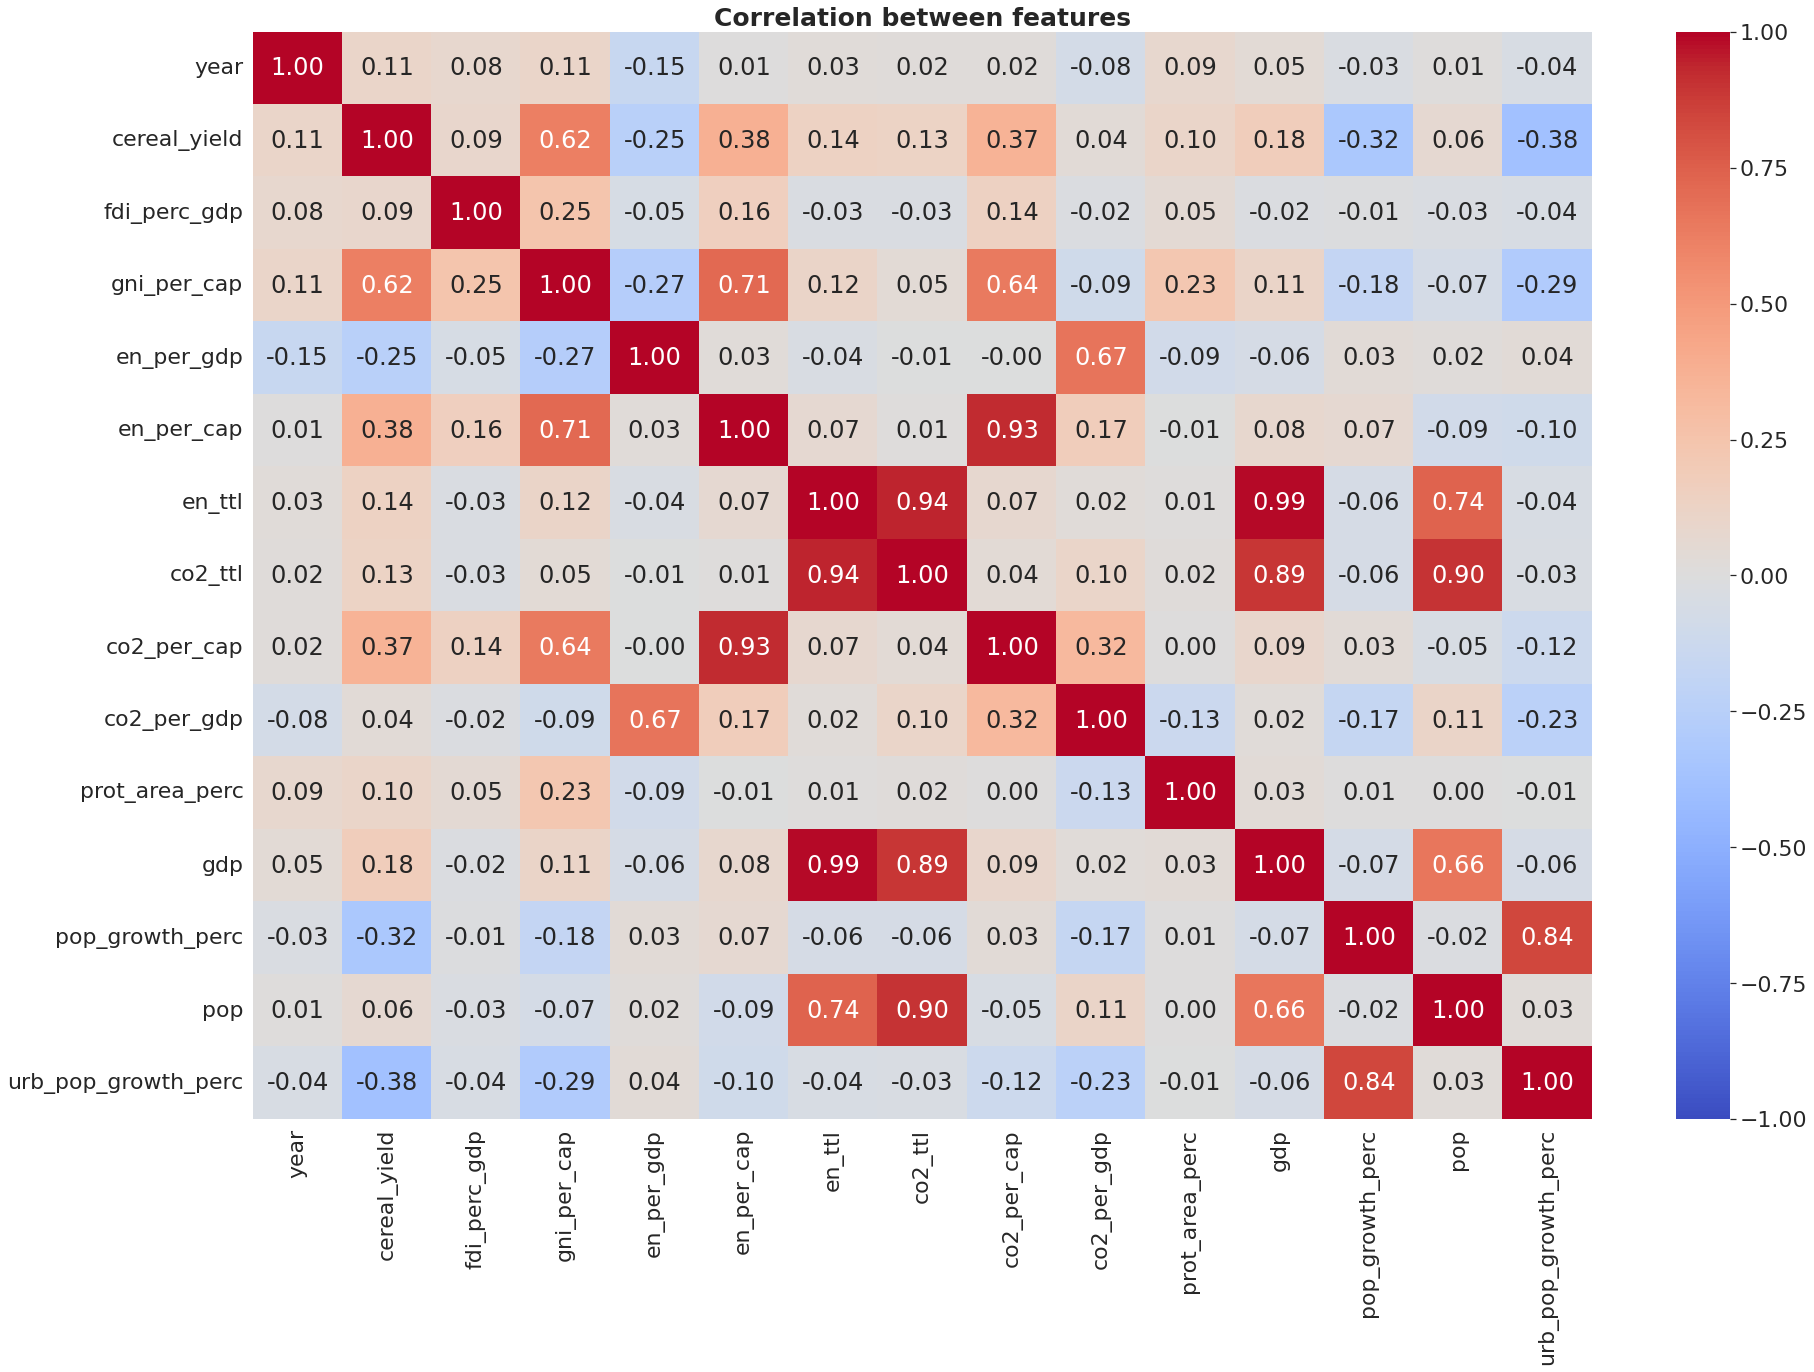

In [283]:
#select all features
#features_all = data_cleaned[['country','year','cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_gdp', 'en_per_cap', 'en_ttl', 'co2_ttl', 'co2_per_cap', 'co2_per_gdp', 'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'pop','urb_pop_growth_perc']]
features_all = data_cleaned[['country','year','cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_gdp', 'en_per_cap', 'en_ttl', 'co2_ttl', 'co2_per_cap', 'co2_per_gdp', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'pop', 'urb_pop_growth_perc']]

# plot a correlation of all features with a ccorrelation matrix

sns.set(font_scale=2)
f,ax=plt.subplots(figsize=(30,20))
sns.heatmap(features_all.corr(), annot=True, cmap='coolwarm', fmt = ".2f", center=0, vmin=-1, vmax=1)
plt.title('Correlation between features', fontsize=25, weight='bold' )
plt.show()

sns.set(font_scale=1)



#Clustering analysis

#10.KMEANS clustering

In [284]:

#data_cleaned1.set_index(["country", "year"], inplace=True,
#           append=True, drop=False)

In [285]:
data_cleaned1.set_index(["year"], inplace=True,
             append=True, drop=False)

In [286]:
data_cleaned1.head()

,,country,year,cereal_yield,fdi_perc_gdp,elec_access_perc,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,...,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop,en_ttl
,year,,,,,,,,,,,,,,,,,,,,,
0,1991,ABW,1991,NaN,21.185138,NaN,NaN,NaN,1928.842,29.838835,NaN,...,NaN,0.104930,8.720670e+08,NaN,NaN,3.936181,6.464200e+04,3.337974,3.232100e+04,NaN
1,1991,ADO,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.558739,1.106891e+09,18820.0,8.2,4.126076,5.499600e+04,3.914659,5.197122e+04,NaN
2,1991,AFG,1991,1160.0,NaN,NaN,NaN,NaN,2493.560,0.126777,NaN,...,7.041783,0.433001,NaN,NaN,197.6,3.391207,1.966881e+07,4.961025,3.658399e+06,NaN
3,1991,AGO,1991,417.4,5.449515,NaN,179.271884,565.451027,4367.397,0.409949,129.971142,...,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,1.065352e+07,6.687032,4.099473e+06,2.185996e+09
4,1991,ALB,1991,2071.8,NaN,NaN,205.474931,565.879281,3971.361,1.206479,438.081414,...,NaN,4.336453,1.139167e+09,420.0,39.8,0.067222,3.291695e+06,1.431500,1.214635e+06,2.340702e+08


Create a different dataset for clustering analysis 

Creation of four 5-years periods

In [287]:
data_cleaned.head()

,,country,year,cereal_yield,fdi_perc_gdp,elec_access_perc,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,...,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop,en_ttl
,year,,,,,,,,,,,,,,,,,,,,,
0,1991,ABW,1991,NaN,21.185138,NaN,NaN,NaN,1928.842,29.838835,NaN,...,NaN,0.104930,8.720670e+08,NaN,NaN,3.936181,6.464200e+04,3.337974,3.232100e+04,NaN
1,1991,ADO,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.558739,1.106891e+09,18820.0,8.2,4.126076,5.499600e+04,3.914659,5.197122e+04,NaN
2,1991,AFG,1991,1160.0,NaN,NaN,NaN,NaN,2493.560,0.126777,NaN,...,7.041783,0.433001,NaN,NaN,197.6,3.391207,1.966881e+07,4.961025,3.658399e+06,NaN
3,1991,AGO,1991,417.4,5.449515,NaN,179.271884,565.451027,4367.397,0.409949,129.971142,...,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,1.065352e+07,6.687032,4.099473e+06,2.185996e+09
4,1991,ALB,1991,2071.8,NaN,NaN,205.474931,565.879281,3971.361,1.206479,438.081414,...,NaN,4.336453,1.139167e+09,420.0,39.8,0.067222,3.291695e+06,1.431500,1.214635e+06,2.340702e+08


In [288]:
# 5 years periods
data_cleaned1.groupby((data_cleaned1.index.get_level_values(1)//5)*5).sum()


,year,cereal_yield,fdi_perc_gdp,elec_access_perc,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,other_ghg_ttl,...,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop,en_ttl
year,,,,,,,,,,,,,,,,,,,,,
1990,1857010,1.678027e+06,1621.308456,0.0,159443.110196,1.279822e+06,3.926490e+08,3721.066630,349617.672547,0.0,...,10222.861500,8417.500810,3.690786e+14,4.702426e+06,57405.641570,1493.213752,1.187405e+11,2164.441642,4.935485e+10,8.170484e+13
1995,2326505,2.332482e+06,4675.930239,0.0,194458.376524,1.665445e+06,5.254098e+08,4916.898368,454837.106401,1553307.4,...,13358.307015,11605.879175,5.692891e+14,6.999759e+06,64782.023838,1654.830964,1.585390e+11,2489.556761,6.880237e+10,1.188142e+14
2000,2332330,2.554418e+06,6154.256835,0.0,183542.829677,1.791233e+06,5.727744e+08,5112.800152,422648.200017,2044926.7,...,13773.724044,12632.687052,6.667156e+14,7.748259e+06,56471.973984,1652.066217,1.694069e+11,2395.325255,7.712100e+10,1.291912e+14
2005,1402194,1.611934e+06,4497.538006,0.0,108227.155317,1.204048e+06,4.080697e+08,3246.517813,235820.385613,2884381.3,...,8487.215563,7800.557865,5.919980e+14,6.904039e+06,30006.236354,1056.649269,1.066475e+11,1501.431731,5.042839e+10,1.104515e+14


In [289]:
data_cleaned1.head()

,,country,year,cereal_yield,fdi_perc_gdp,elec_access_perc,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,...,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop,en_ttl
,year,,,,,,,,,,,,,,,,,,,,,
0,1991,ABW,1991,NaN,21.185138,NaN,NaN,NaN,1928.842,29.838835,NaN,...,NaN,0.104930,8.720670e+08,NaN,NaN,3.936181,6.464200e+04,3.337974,3.232100e+04,NaN
1,1991,ADO,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.558739,1.106891e+09,18820.0,8.2,4.126076,5.499600e+04,3.914659,5.197122e+04,NaN
2,1991,AFG,1991,1160.0,NaN,NaN,NaN,NaN,2493.560,0.126777,NaN,...,7.041783,0.433001,NaN,NaN,197.6,3.391207,1.966881e+07,4.961025,3.658399e+06,NaN
3,1991,AGO,1991,417.4,5.449515,NaN,179.271884,565.451027,4367.397,0.409949,129.971142,...,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,1.065352e+07,6.687032,4.099473e+06,2.185996e+09
4,1991,ALB,1991,2071.8,NaN,NaN,205.474931,565.879281,3971.361,1.206479,438.081414,...,NaN,4.336453,1.139167e+09,420.0,39.8,0.067222,3.291695e+06,1.431500,1.214635e+06,2.340702e+08


In [290]:
data_cleaned.set_index(["country", "year"], inplace=True,
             append=True, drop=False)

In [291]:
data_cleaned.columns


Index(['country', 'year', 'cereal_yield', 'fdi_perc_gdp', 'elec_access_perc',
       'en_per_gdp', 'en_per_cap', 'co2_ttl', 'co2_per_cap', 'co2_per_gdp',
       'other_ghg_ttl', 'ch4_ttl', 'n2o_ttl', 'nat_emerg', 'pop_urb_aggl_perc',
       'prot_area_perc', 'gdp', 'gni_per_cap', 'under_5_mort_rate',
       'pop_growth_perc', 'pop', 'urb_pop_growth_perc', 'urb_pop', 'en_ttl'],
      dtype='object')

In [292]:
# Getting the list of columns
col = data_cleaned.columns
  
# Printing Number of columns
print('Number of columns :', len(col))

Number of columns : 24


In [293]:
data_cleaned.drop(data_cleaned.iloc[:, 7:21], inplace=True, axis=1)

In [294]:
data_cleaned.head()

,,,,country,year,cereal_yield,fdi_perc_gdp,elec_access_perc,en_per_gdp,en_per_cap,urb_pop_growth_perc,urb_pop,en_ttl
,year,country,year,,,,,,,,,,
0,1991,ABW,1991,ABW,1991,NaN,21.185138,NaN,NaN,NaN,3.337974,3.232100e+04,NaN
1,1991,ADO,1991,ADO,1991,NaN,NaN,NaN,NaN,NaN,3.914659,5.197122e+04,NaN
2,1991,AFG,1991,AFG,1991,1160.0,NaN,NaN,NaN,NaN,4.961025,3.658399e+06,NaN
3,1991,AGO,1991,AGO,1991,417.4,5.449515,NaN,179.271884,565.451027,6.687032,4.099473e+06,2.185996e+09
4,1991,ALB,1991,ALB,1991,2071.8,NaN,NaN,205.474931,565.879281,1.431500,1.214635e+06,2.340702e+08


In [295]:
#basket_new = data_cleaned.drop(data_cleaned.columns[[2]], axis=1, inplace=True)
data_cleaned1=data_cleaned1.drop(['country'], axis=1)
#data_cleaned1=data_cleaned1.drop(['elec_access_perc'], axis=1)
data_cleaned1=data_cleaned1.drop(['elec_access_perc'], axis=1)
basket_new = data_cleaned1
#basket_new = basket_new.sort_values(['country','year'])
#pd.set_option("display.max_rows", None, "display.max_columns", None)


In [296]:
data_cleaned.head()

,,,,country,year,cereal_yield,fdi_perc_gdp,elec_access_perc,en_per_gdp,en_per_cap,urb_pop_growth_perc,urb_pop,en_ttl
,year,country,year,,,,,,,,,,
0,1991,ABW,1991,ABW,1991,NaN,21.185138,NaN,NaN,NaN,3.337974,3.232100e+04,NaN
1,1991,ADO,1991,ADO,1991,NaN,NaN,NaN,NaN,NaN,3.914659,5.197122e+04,NaN
2,1991,AFG,1991,AFG,1991,1160.0,NaN,NaN,NaN,NaN,4.961025,3.658399e+06,NaN
3,1991,AGO,1991,AGO,1991,417.4,5.449515,NaN,179.271884,565.451027,6.687032,4.099473e+06,2.185996e+09
4,1991,ALB,1991,ALB,1991,2071.8,NaN,NaN,205.474931,565.879281,1.431500,1.214635e+06,2.340702e+08


In [297]:
basket_new

,,,,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,urb_pop_growth_perc,urb_pop,en_ttl
,year,country,year,,,,,,,,
0,1991,ABW,1991,1991,NaN,21.185138,NaN,NaN,3.337974,3.232100e+04,NaN
1,1991,ADO,1991,1991,NaN,NaN,NaN,NaN,3.914659,5.197122e+04,NaN
2,1991,AFG,1991,1991,1160.0,NaN,NaN,NaN,4.961025,3.658399e+06,NaN
3,1991,AGO,1991,1991,417.4,5.449515,179.271884,565.451027,6.687032,4.099473e+06,2.185996e+09
4,1991,ALB,1991,1991,2071.8,NaN,205.474931,565.879281,1.431500,1.214635e+06,2.340702e+08
...,...,...,...,...,...,...,...,...,...,...,...
3956,2007,YEM,2007,2007,1019.4,4.235665,145.202573,325.325432,4.996650,6.597265e+06,3.144587e+09
3957,2007,ZAF,2007,2007,2791.8,2.004735,306.914442,2876.946613,1.896416,2.907984e+07,8.782944e+10
3958,2007,ZAR,2007,2007,771.5,18.121536,1223.051316,353.058814,4.686852,2.026144e+07,1.220248e+10


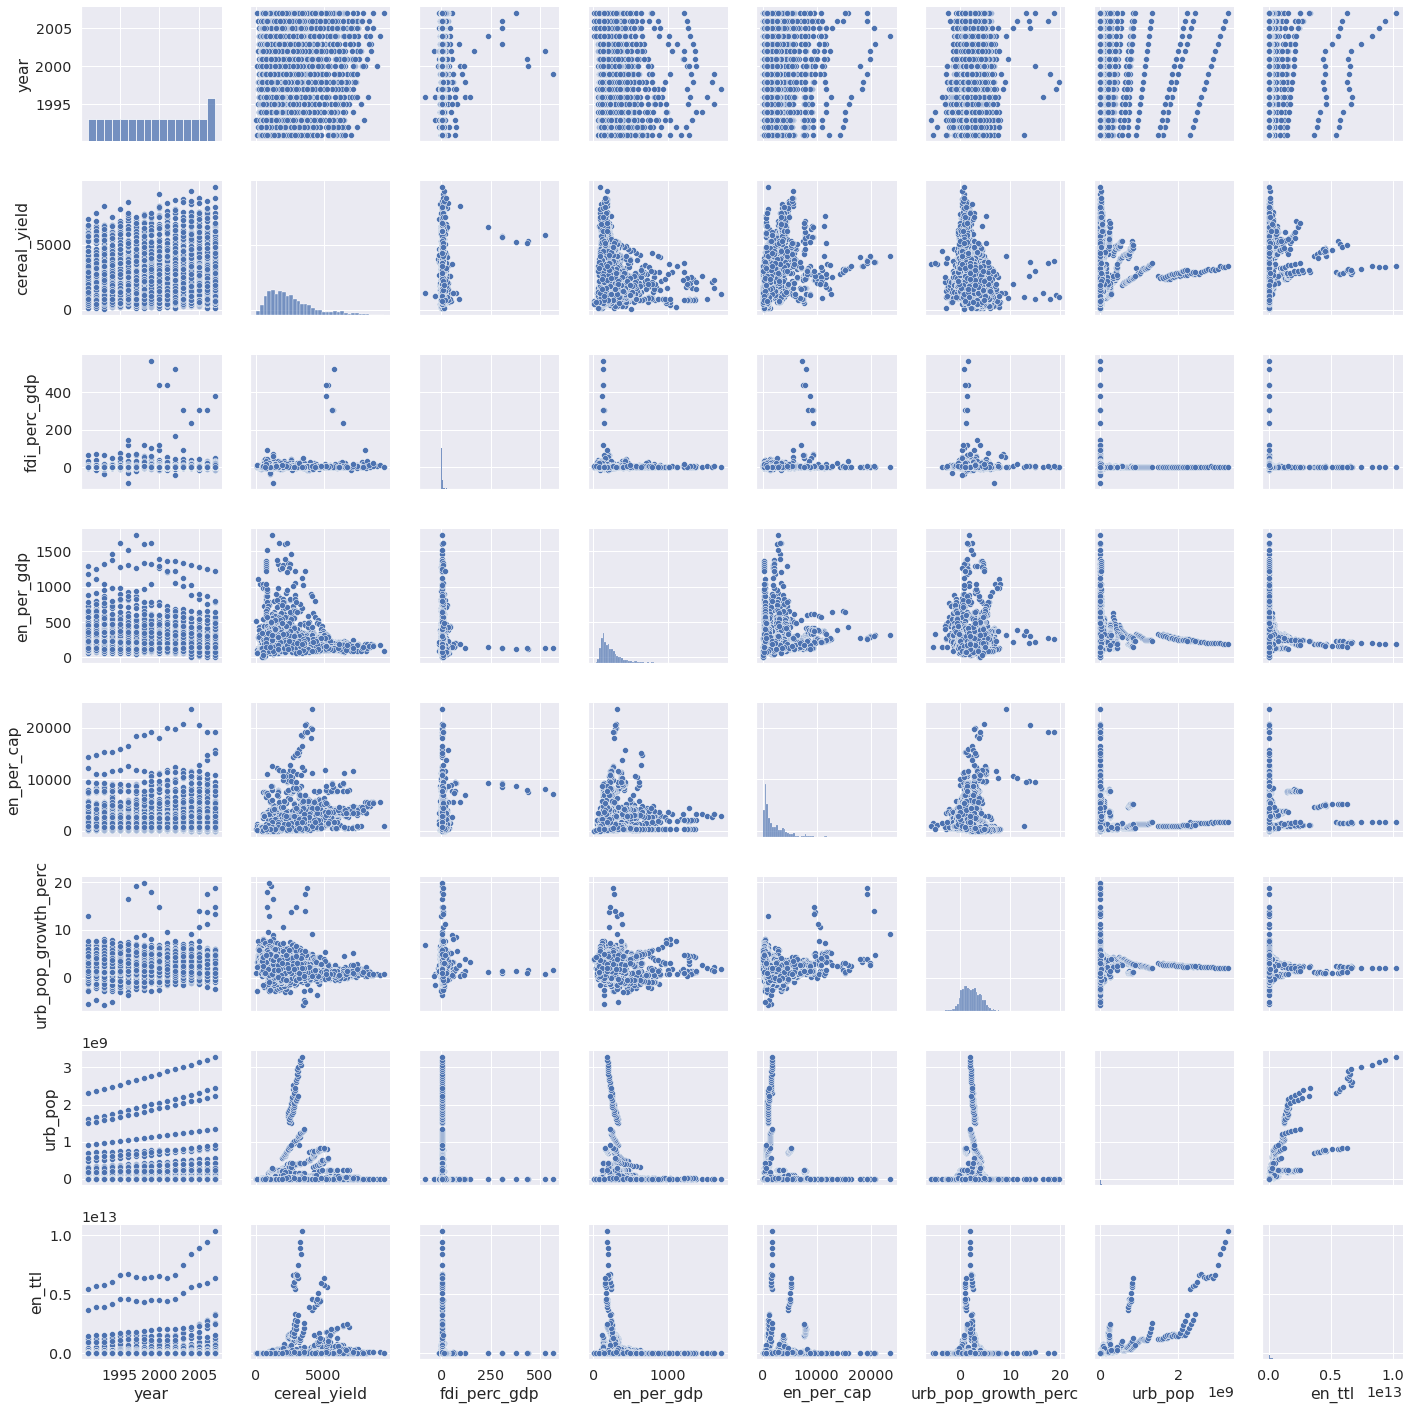

In [298]:
sns.set(font_scale=1.3)
#pairplot(data=basket_new, hue='country')
#sns.pairplot(data_cleaned, hue='country', dropna = True)
sns.pairplot(pd.DataFrame(basket_new), dropna = True)

 Transform everything in log10 base and then standardize via min max

In [299]:
basket_log = np.log10(basket_new)
basket_log =  basket_log.replace(-np.inf , 0.0000001)
basket_log =  basket_log.fillna(0.0000001)



View the logarithmic data

In [300]:
basket_log

,,,,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,urb_pop_growth_perc,urb_pop,en_ttl
,year,country,year,,,,,,,,
0,1991,ABW,1991,3.299071,1.000000e-07,1.326031e+00,1.000000e-07,1.000000e-07,0.523483,4.509485,1.000000e-07
1,1991,ADO,1991,3.299071,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,0.592694,4.715763,1.000000e-07
2,1991,AFG,1991,3.299071,3.064458e+00,1.000000e-07,1.000000e-07,1.000000e-07,0.695571,6.563291,1.000000e-07
3,1991,AGO,1991,3.299071,2.620552e+00,7.363578e-01,2.253512e+00,2.752395e+00,0.825233,6.612728,9.339649e+00
4,1991,ALB,1991,3.299071,3.316348e+00,1.000000e-07,2.312759e+00,2.752724e+00,0.155791,6.084446,8.369346e+00
...,...,...,...,...,...,...,...,...,...,...,...
3956,2007,YEM,2007,3.302547,3.008345e+00,6.269216e-01,2.161974e+00,2.512318e+00,0.698679,6.819364,9.497564e+00
3957,2007,ZAF,2007,3.302547,3.445884e+00,3.020570e-01,2.487017e+00,3.458932e+00,0.277934,7.463592,1.094364e+01
3958,2007,ZAR,2007,3.302547,2.887336e+00,1.258195e+00,3.087445e+00,2.547847e+00,0.670881,7.306670,1.008645e+01


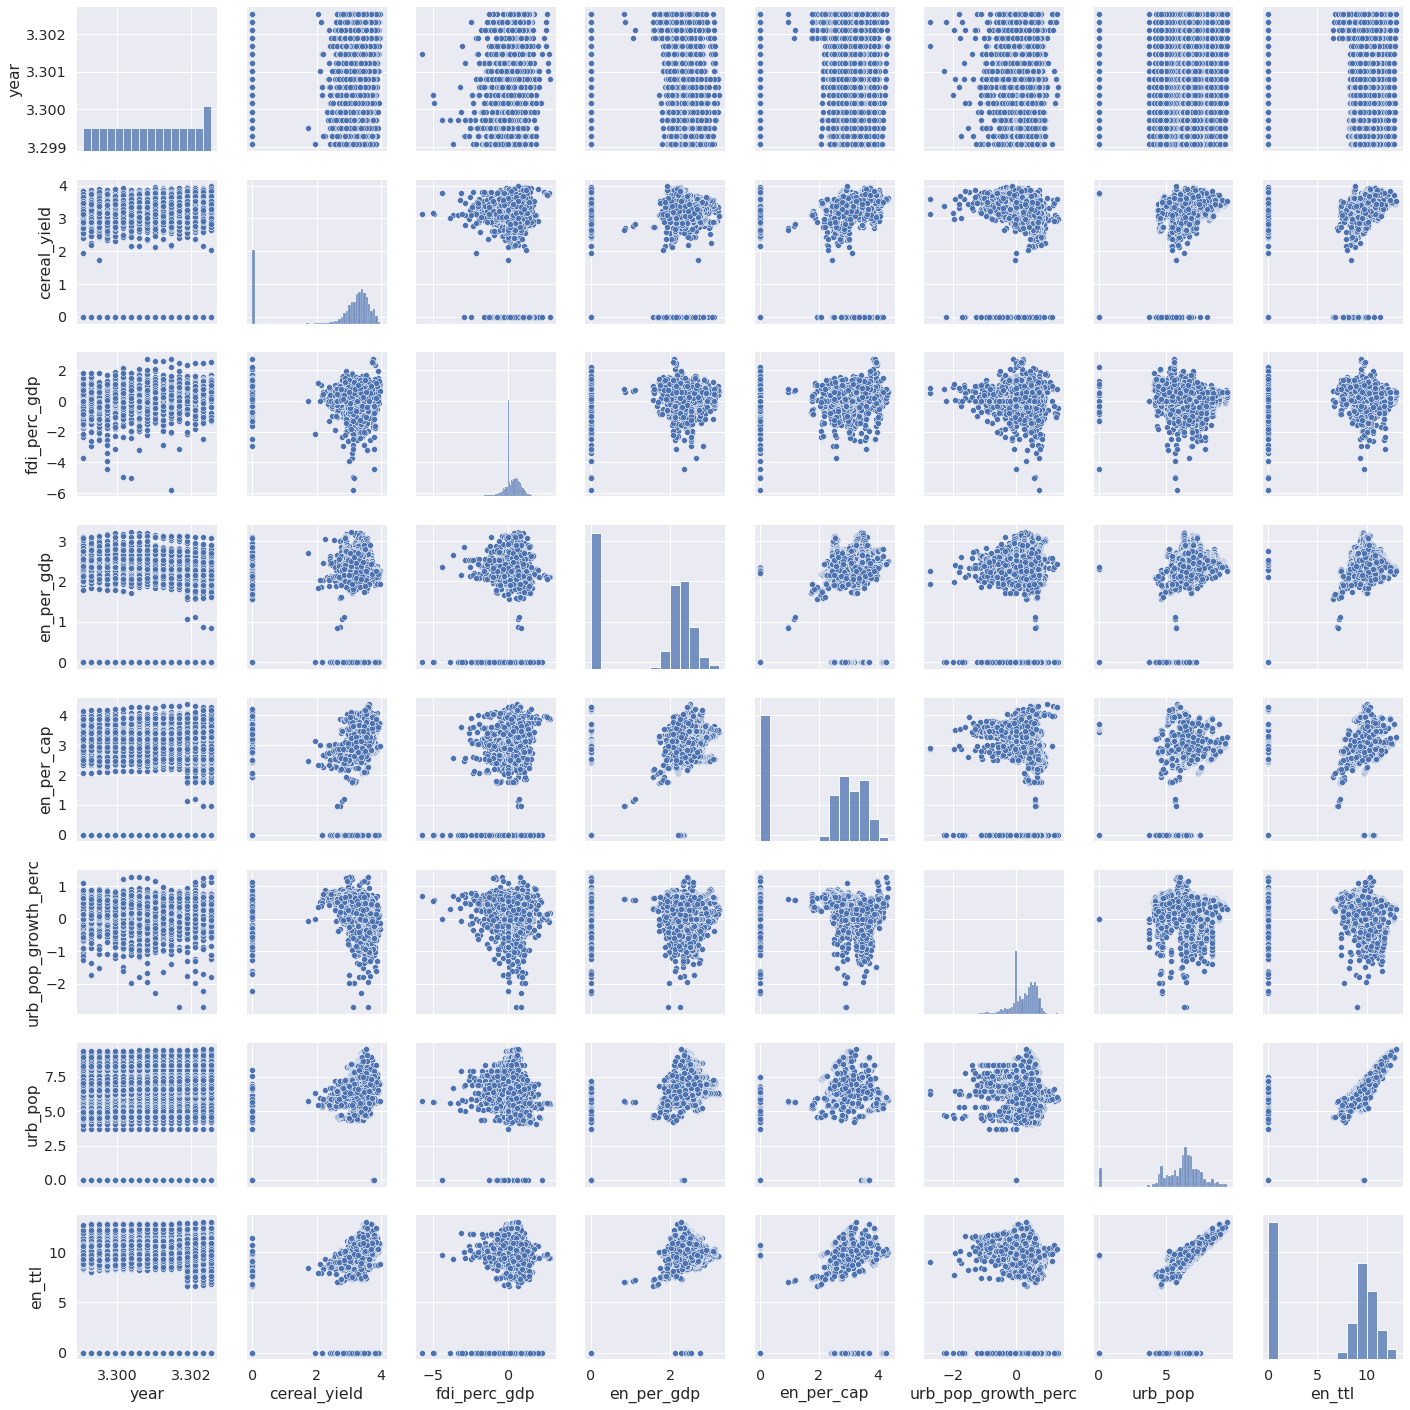

In [301]:
sns.set(font_scale=1.3)
sns.pairplot(basket_log)

I try Min Max Scaler

In [302]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler([-1,1])
scaler.fit(basket_log)
#scaler.fit(feature)
basket_scaled = scaler.transform(basket_log)
#scaler.fit(feature)

In [303]:
basket_scaled = pd.DataFrame(basket_scaled)

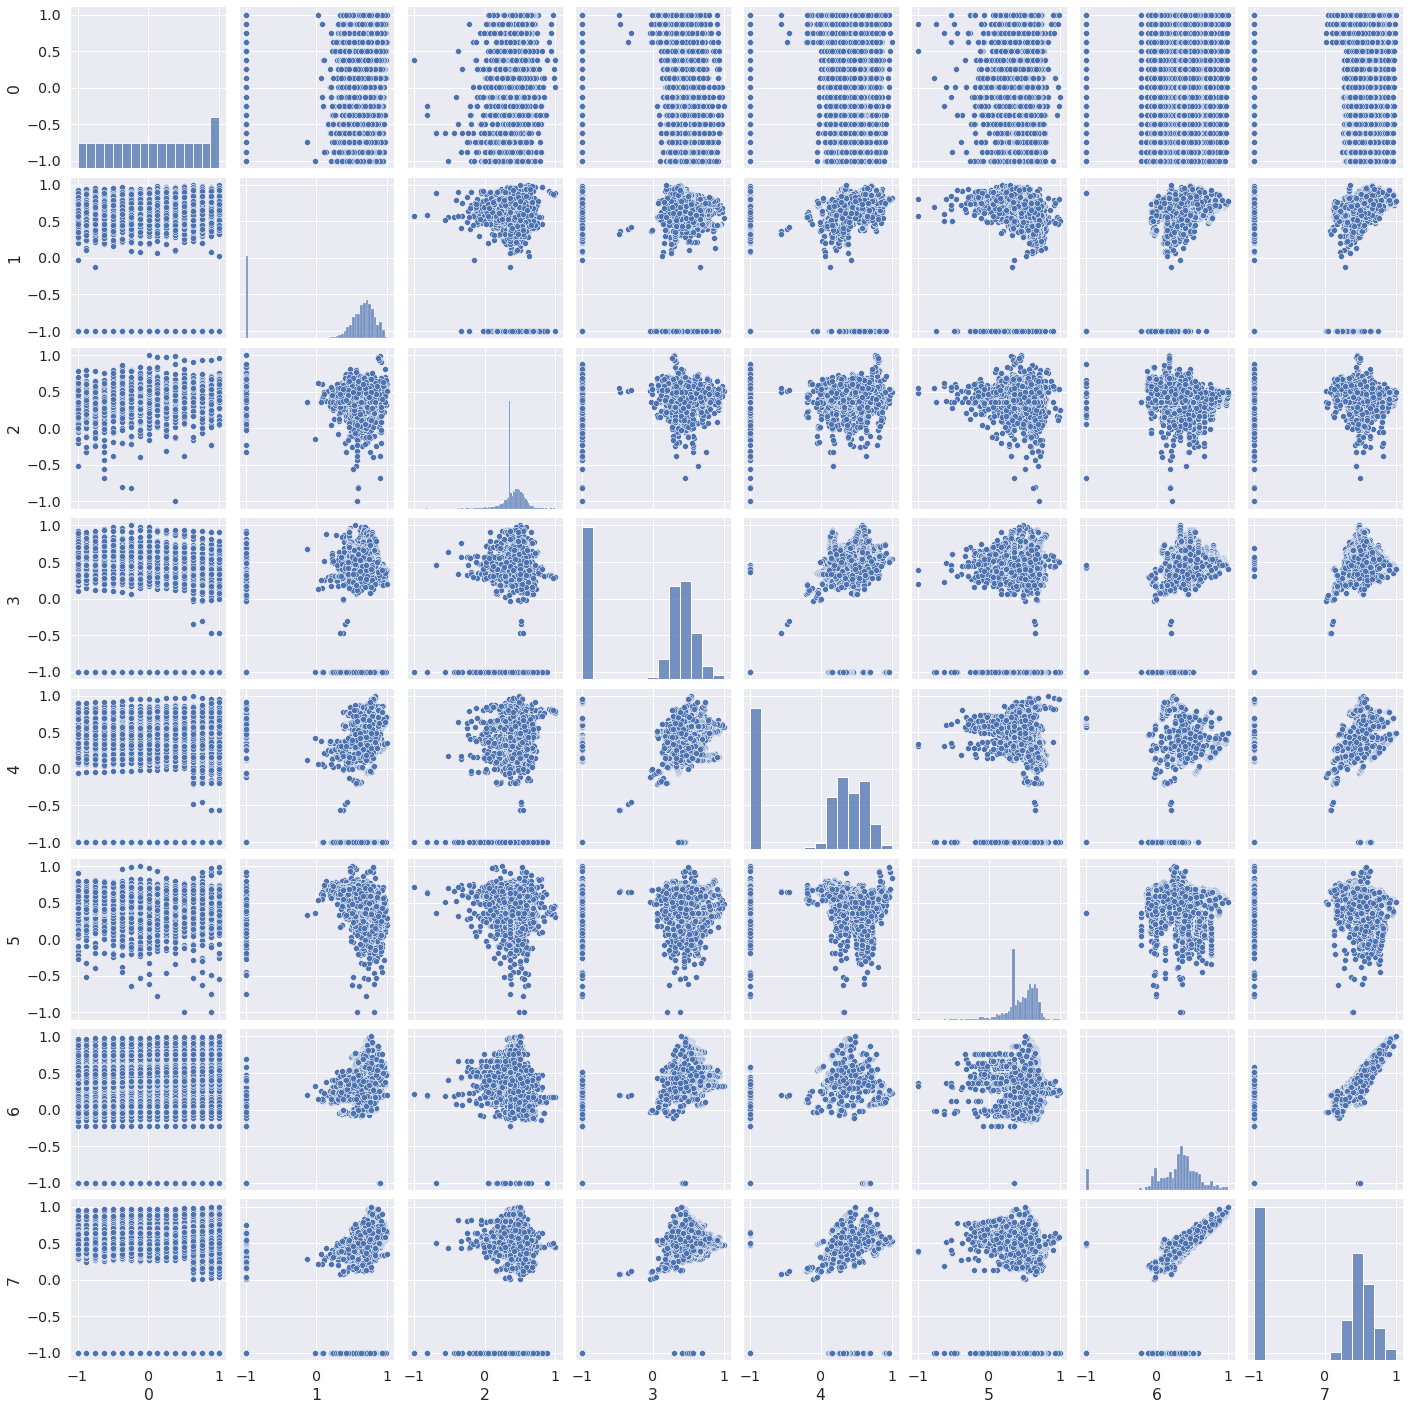

In [304]:
sns.pairplot(pd.DataFrame(basket_scaled), dropna = True)



I apply the clustering algorithm KMEANS++

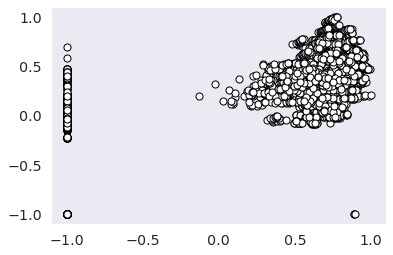

In [305]:
focus = [0,1,2,3,4,5,6]


arr = np.array(basket_scaled)

plt.scatter(arr[:,focus[1]], arr[:,focus[6]]
            , c='white'          # color filling the data markers
            , edgecolors='black' # edge color for data markers
            , marker='o'         # data marker shape, e.g. triangles (v<>^), square (s), star (*), ...
            , s=50)              # data marker size
plt.grid()  # plots a grid on the data
plt.show()

In [306]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

k_range = range(2,10)
rnd_state = 42

distortions = []
silhouette_scores = []
for i in k_range:
    km = KMeans(n_clusters=i, 
                init='random', 
                n_init=10, 
                max_iter=300, 
                random_state=rnd_state)
    y_km = km.fit_predict(basket_scaled)
    distortions.append(km.inertia_)
    silhouette_scores.append(silhouette_score(basket_scaled,y_km))

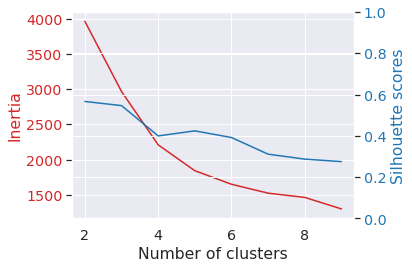

In [307]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(k_range, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)
 
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Silhouette scores', color=color)  # we already handled the x-label with ax1
ax2.plot(k_range, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,1) # the axis for silhouette is [0,1]

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [308]:
good_k = 4
km = KMeans(n_clusters=good_k, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=rnd_state)
y_km = km.fit_predict(basket_scaled)

In [309]:
km.cluster_centers_



array([[-0.05106995, -1.        ,  0.38446733, -0.99681322, -0.94006768,
         0.39221167, -0.32043413, -0.99667169],
       [ 0.58801438,  0.61819698,  0.46292874,  0.40440523,  0.41576283,
         0.459887  ,  0.435514  ,  0.5196994 ],
       [-0.49447611,  0.55848406,  0.38260763,  0.45810189,  0.41190026,
         0.46951519,  0.45838994,  0.52163225],
       [-0.11344464,  0.59761828,  0.36329684, -1.        , -0.83468215,
         0.5470879 ,  0.2184096 , -1.        ]])

In [310]:
from matplotlib import cm
def plot_clusters(X, y, dim, points,
                  labels_prefix = 'cluster', 
                  points_name = 'centroids',
                  colors = cm.tab10, 
                  # a qualitative map 
                      # https://matplotlib.org/examples/color/colormaps_reference.html
#                   colors = ['brown', 'orange', 'olive', 
#                             'green', 'cyan', 'blue', 
#                             'purple', 'pink'],
#                   points_color = 'red'
                  points_color = cm.tab10(10) # by default the last of the map (to be improved)
                 ):
    """
    Plot a two dimensional projection of an array of labelled points
    X:      array with at least two columns
    y:      vector of labels, length as number of rows in X
    dim:    the two columns to project, inside range of X columns, e.g. (0,1)
    points: additional points to plot as 'stars'
    labels_prefix: prefix to the labels for the legend ['cluster']
    points_name:   legend name for the additional points ['centroids']
    colors: a color map
    points_color: the color for the points
    """
    # plot the labelled (colored) dataset and the points
    labels = np.unique(y)
    for i in range(len(labels)):
        color = colors(i / len(labels)) # choose a color from the map
        plt.scatter(X[y==labels[i],dim[0]], 
                    X[y==labels[i],dim[1]], 
                    s=10, 
                    c = [color], # scatter requires a sequence of colors
                    marker='s', 
                    label=labels_prefix+str(labels[i]))
    plt.scatter(points[:,dim[0]], 
                points[:,dim[1]], 
                s=50, 
                marker='*', 
                c=[points_color], 
                label=points_name)
    plt.legend()
    plt.grid()
    plt.show()   

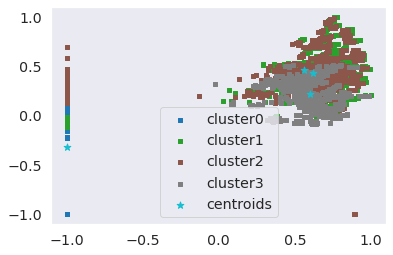

In [311]:
plot_clusters(arr,y_km,dim=(focus[1],focus[6]), points = km.cluster_centers_)



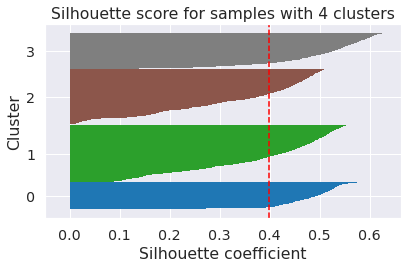

In [312]:
from plot_silhouette import plot_silhouette

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0] # it is the number of rows
# Compute the Silhouette Coefficient for each sample, with the euclidean metric
silhouette_score_samples = silhouette_samples(basket_scaled, y_km, metric='euclidean')
plt.title('Silhouette score for samples with {} clusters'.format(good_k))
plot_silhouette(silhouette_score_samples, y_km)

In [313]:
basket_scaled['target'] = km.labels_



#11.DBSCAN clustering algorithm

I apply the DBSCAN clustering algorithm

In [314]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import MinMaxScaler

db = DBSCAN()
y_db = db.fit_predict(arr)
print(db)

DBSCAN()


In [315]:
cluster_labels_all = np.unique(y_db)
cluster_labels = cluster_labels_all[cluster_labels_all != -1]
n_clusters = len(cluster_labels)
if cluster_labels_all[0] == -1:
    noise = True
    print("There is noise")
else:
    noise = False
print("There is/are {} cluster(s)".format(n_clusters-noise))

There is noise
There is/are 8 cluster(s)


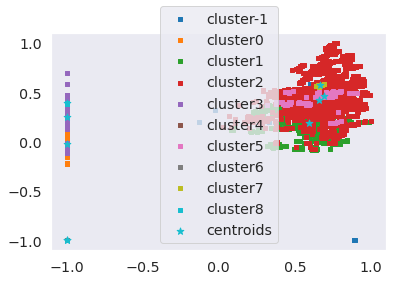

In [316]:
cluster_centers = np.empty((n_clusters,arr.shape[1]))
for i in cluster_labels:
    cluster_centers[i,:] = np.mean(arr[y_db==i,:], axis = 0)
plot_clusters(arr,y_db,dim=(focus[1],focus[6]), points = cluster_centers)



In [317]:
param_grid = {'eps': list(np.arange(0.1, 0.4, 0.01)), 'min_samples': list(range(1,10,1))}
params = list(ParameterGrid(param_grid))
sil_thr = 0  # visualize results only for combinations with silhouette above the threshold
# unc_thr = 33 # visualize results only for combinations with unclustered% below the threshold
unc_thr = 10 # visualize results only for combinations with unclustered% below the

In [318]:
print("{:11}\t{:11}\t{:11}\t{:11}\t{:11}".\
      format('        eps','min_samples',' n_clusters',' silhouette', '    unclust%'))
for i in range(len(params)):
    db = DBSCAN(**(params[i]))
    y_db = db.fit_predict(arr)
    cluster_labels_all = np.unique(y_db)
    cluster_labels = cluster_labels_all[cluster_labels_all != -1]
    n_clusters = len(cluster_labels)
    if n_clusters > 1:
        X_cl = arr[y_db!=-1,:]
        y_db_cl = y_db[y_db!=-1]
        silhouette = silhouette_score(X_cl,y_db_cl)
        uncl_p = (1 - y_db_cl.shape[0]/y_db.shape[0]) * 100
        if silhouette > sil_thr and uncl_p < unc_thr:
            print("{:11.2f}\t{:11}\t{:11}\t{:11.2f}\t{:11.2f}%"\
                  .format(db.eps, db.min_samples, n_clusters, silhouette, uncl_p))

        eps	min_samples	 n_clusters	 silhouette	    unclust%
       0.10	          1	       3286	       0.11	       0.00%
       0.11	          1	       3187	       0.10	       0.00%
       0.12	          1	       3046	       0.10	       0.00%
       0.28	          4	         26	       0.04	       3.38%
       0.28	          5	         20	       0.05	       5.33%
       0.28	          6	         12	       0.27	       9.44%
       0.29	          4	         25	       0.04	       2.85%
       0.29	          5	         20	       0.05	       4.57%
       0.29	          6	         13	       0.27	       8.31%
       0.30	          4	         23	       0.07	       2.45%
       0.30	          5	         19	       0.06	       4.09%
       0.30	          6	         10	       0.46	       7.14%
       0.30	          7	         10	       0.26	       8.61%
       0.30	          8	          8	       0.47	       9.72%
       0.31	          2	         25	       0.03	       0.88%
       0.31	          3	

In [319]:
# db = DBSCAN(eps=0.9, min_samples=4)
# db = DBSCAN(eps=0.28, min_samples=9)
# db = DBSCAN(eps=0.1, min_samples=9)
# db = DBSCAN(eps=0.05, min_samples=9)
db = DBSCAN(eps=0.40, min_samples=1)
y_db = db.fit_predict(arr)
cluster_labels_all = np.unique(y_db)
cluster_labels = cluster_labels_all[cluster_labels_all != -1]
n_clusters = len(cluster_labels)

In [320]:
print("There are {} clusters".format(n_clusters))



There are 32 clusters


In [321]:
print("The cluster labels are {}".format(cluster_labels))

The cluster labels are [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


In [322]:
cluster_centers



array([[-0.08657146, -1.        ,  0.39509176, -1.        , -1.        ,
         0.41252828, -0.01981807, -1.        ],
       [-0.10682966,  0.59074224,  0.376898  , -1.        , -1.        ,
         0.56276098,  0.19108416, -1.        ],
       [ 0.05935064,  0.69064519,  0.41816394,  0.43321006,  0.41320149,
         0.47138475,  0.4606854 ,  0.53190306],
       [-0.04069629, -1.        ,  0.51117485,  0.41058715,  0.59685441,
         0.39638887,  0.25338409,  0.44373072],
       [ 0.00125063, -1.        ,  0.35840294, -1.        , -1.        ,
         0.35481726, -1.        , -1.        ],
       [-0.1573821 ,  0.65624565,  0.27911719, -1.        ,  0.39606829,
         0.44247031,  0.42491245, -1.        ],
       [ 0.00125063, -1.        ,  0.35390672, -1.        ,  0.65989158,
         0.35481726, -1.        , -1.        ],
       [-0.2485614 ,  0.66445488,  0.54306047,  0.40286395, -1.        ,
         0.35481726,  0.56913548,  0.63484935],
       [-0.68653454, -1.        

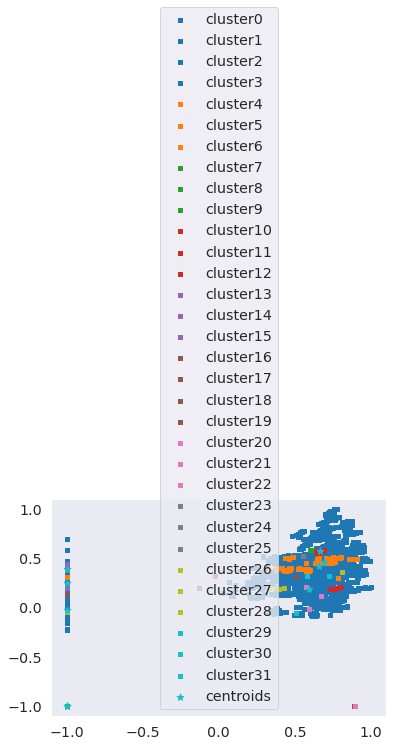

In [323]:
plot_clusters(arr,y_db,dim=(focus[1],focus[6]), points = cluster_centers)



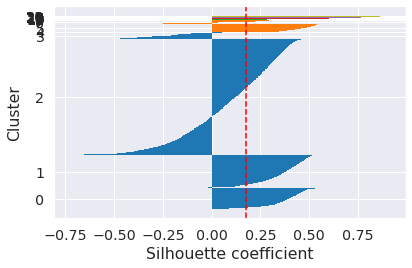

In [324]:
# X_cl = X[y_db!=-1,:]
# y_db_cl = y_db[y_db!=-1]
# silhouette = silhouette_samples(X_cl,y_db_cl)
# plot_silhouette(silhouette,y_db_cl)
silhouette = silhouette_samples(arr,y_db)
plot_silhouette(silhouette,y_db)



#12. Visualization conclusion
